## Data reading and cleaning

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading LIWC data
df_liwc=pd.read_csv("data/LIWC-22 Results - depression_SG_reddit_liwc_inpu___ - LIWC Analysis.csv", index_col=False)

# Subsetting the DataFrame
columns = [
    "id","title","need", "want", "acquire", "lack", "fulfill",
    "fatigue", "reward", "risk", "curiosity", "allure",
    "leisure", "home","work","money","relig"
]

df_liwc = df_liwc[columns]

In [3]:
# reading documents data
documents=pd.read_csv("document_clusters.csv", index_col=False)
# merging data from documents with LIWC
data = pd.merge(
    documents, df_liwc, on=['title','id'], how='left'
)

In [4]:
# subsetting the merged data
columns=['title', 'Topic', 'Name', 'Representation',  "selftext",
         'selftext','need', 'want', 'acquire', 'lack', 'fulfill',
         'fatigue', 'reward', 'risk', 'curiosity', 'allure',
         "leisure", "home","work","money","relig"]
data=data[columns]
data["religion"]=data["relig"]

In [5]:
# removing topic -1 (outlier)
data = (data[data["Topic"] != -1]).reset_index(drop=True)

In [6]:
def clean_topic_representation(topic):
    '''
    Parameters:
        topic (str): topic number obtained from BERTopic
    Returns:
        A string from this format: 0_psychiatrist_seek_affordable_attacks to Topic 0: psychiatrist, seek, affordable, attacks
    '''
    parts = topic.split('_')
    # The first part is the numeric index
    index = parts[0]
    # The remaining parts are the words
    words = ', '.join(parts[1:])
    # Format the output as required
    formatted = f"Topic {index}: {words}"
    return(formatted)
data["Topic"]=data["Name"].apply(clean_topic_representation)

def plot_smooth_distribution_by_topic(df, column_name,v_line=None):
    """
    Plots a smooth kernel density estimation (KDE) curve of a specified column
    based on the 'Topic' column in the DataFrame, after removing rows where
    the specified column has NaN values.
    
    Args:
        df (pd.DataFrame): The input DataFrame containing the data.
        column_name (str): The name of the column to plot distributions for.
    """
    # Drop rows where column_name has NaN values
    df = df.dropna(subset=[column_name])
    unique_topics = sorted(df["Topic"].unique())
    # Plot KDE distribution by topic
    plt.figure(figsize=(10, 6))
    for topic in unique_topics:
        subset = df[df["Topic"] == topic]
        sns.kdeplot(subset[column_name], label=f"{topic}", fill=True, alpha=0.5)
    # Add vertical red line if v_line is provided
    if v_line is not None:
        plt.axvline(x=v_line, color='red', linestyle='--', linewidth=2)
  
    # Add labels, title, and legend
    plt.xlabel("Score")
    plt.ylabel("Density")
    plt.title(f"Distribution of '{column_name}' by Topic")
    plt.legend(title="Topic")
    
    # Save the plot
    output_path = f"../plots/LIWC/{column_name}.jpg"
    plt.savefig(output_path, bbox_inches='tight',dpi=1200)
    plt.show()
    
    print(f"Plot saved at: {output_path}")




## Plotting for "States"

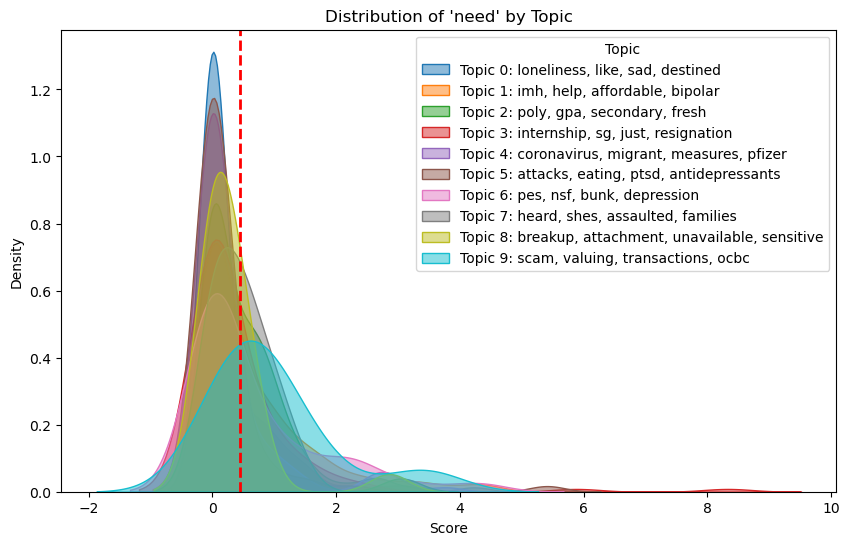

Plot saved at: plots/LIWC/need.jpg


In [8]:
plot_smooth_distribution_by_topic(data, "need",0.45)

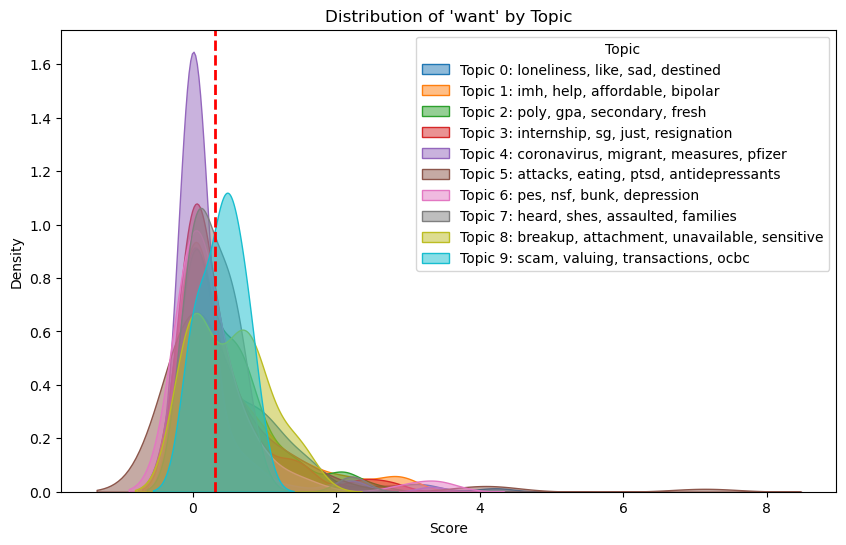

Plot saved at: plots/LIWC/want.jpg


In [9]:
# Example Usage:
plot_smooth_distribution_by_topic(data, "want",0.31)

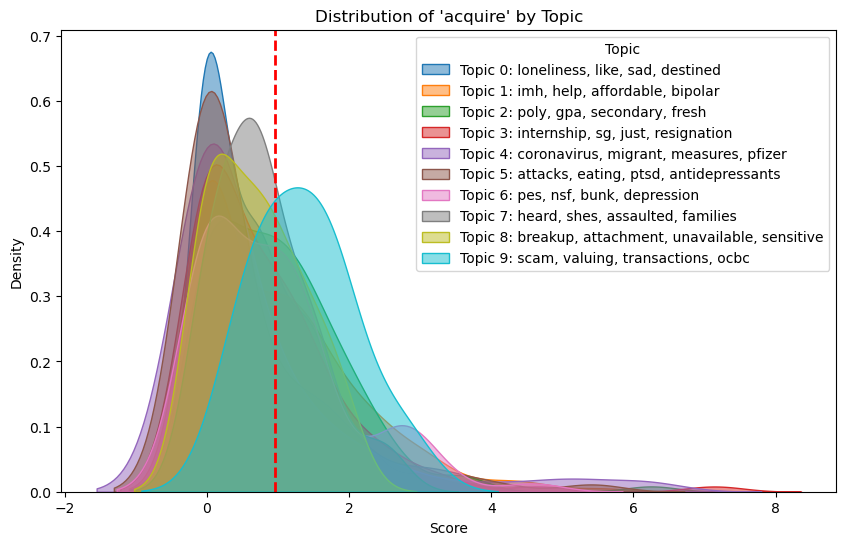

Plot saved at: plots/LIWC/acquire.jpg


In [10]:
plot_smooth_distribution_by_topic(data, "acquire",0.96)

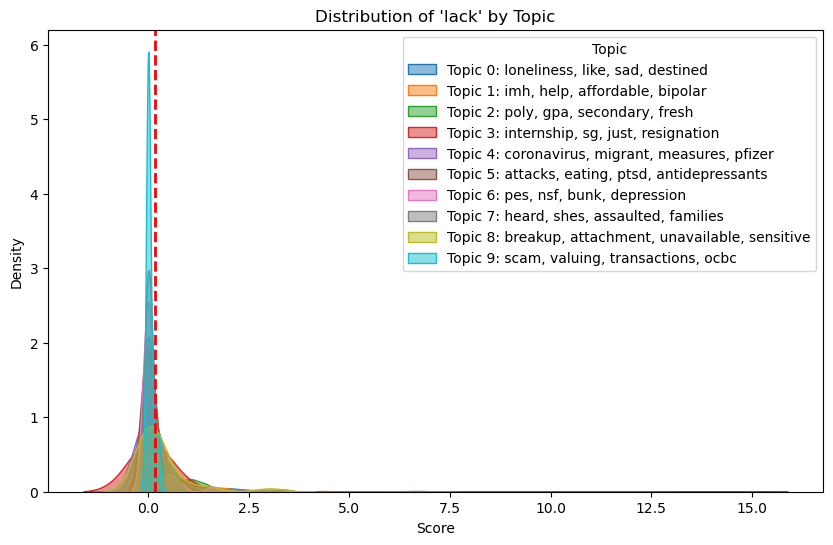

Plot saved at: plots/LIWC/lack.jpg


In [11]:
plot_smooth_distribution_by_topic(data, "lack",0.16)

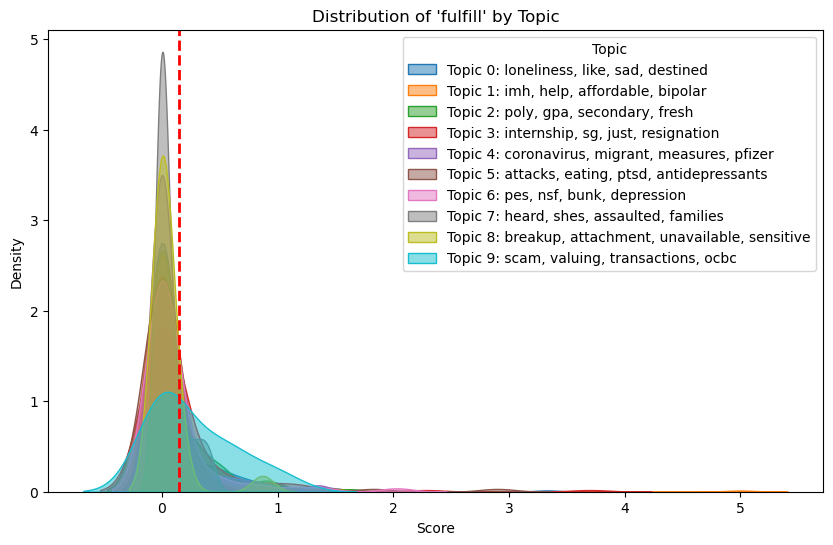

Plot saved at: plots/LIWC/fulfill.jpg


In [12]:
plot_smooth_distribution_by_topic(data, "fulfill",0.15)

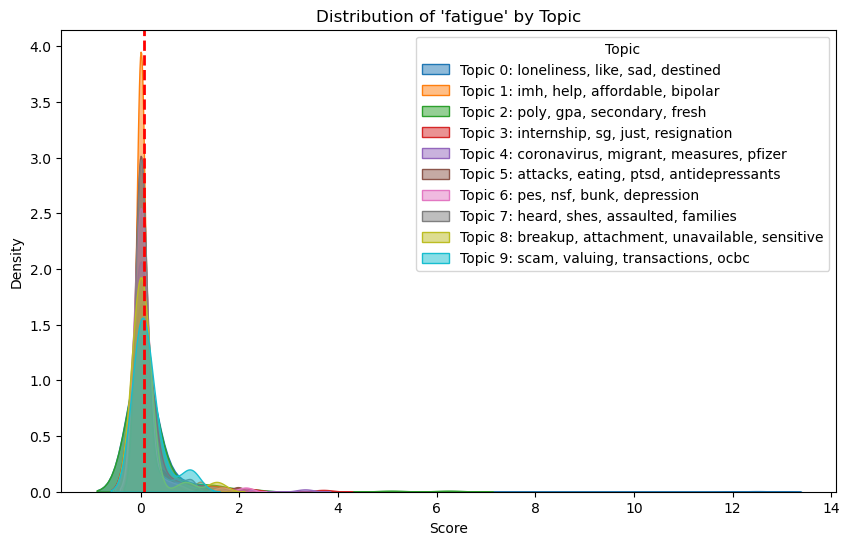

Plot saved at: plots/LIWC/fatigue.jpg


In [13]:
plot_smooth_distribution_by_topic(data, "fatigue",0.06)

## plotting for "motives"

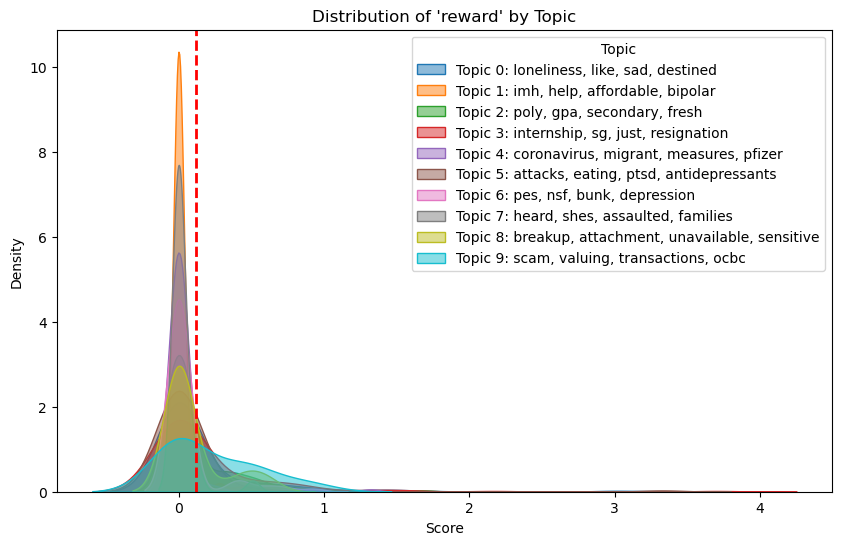

Plot saved at: plots/LIWC/reward.jpg


In [15]:
plot_smooth_distribution_by_topic(data, "reward",0.12)

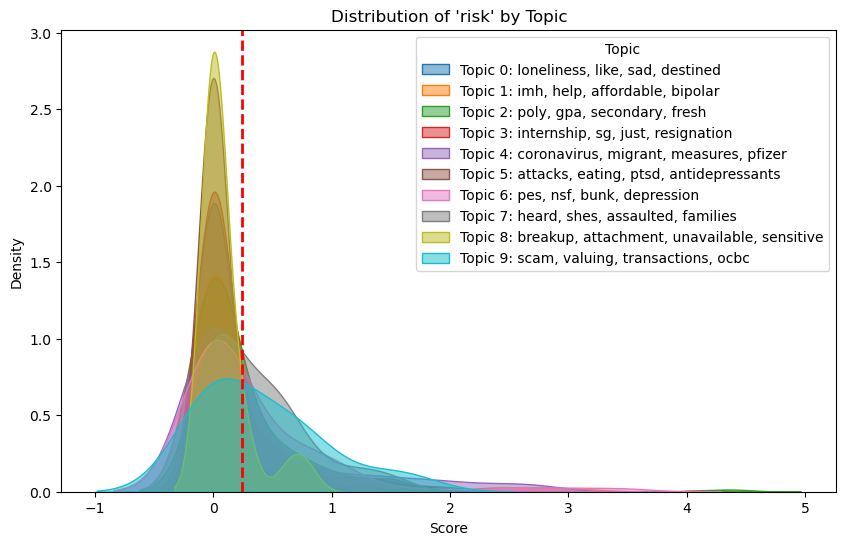

Plot saved at: plots/LIWC/risk.jpg


In [16]:
plot_smooth_distribution_by_topic(data, "risk",0.24)

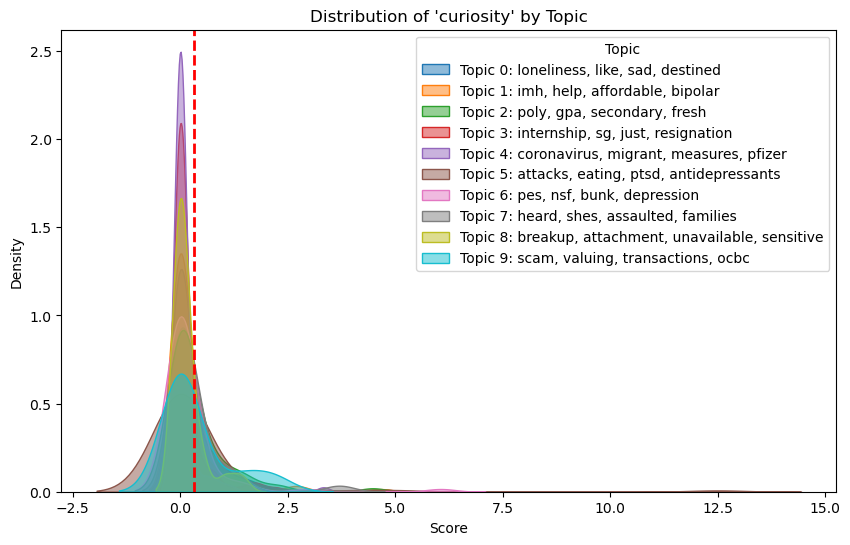

Plot saved at: plots/LIWC/curiosity.jpg


In [17]:
plot_smooth_distribution_by_topic(data, "curiosity",0.33) # curiosity

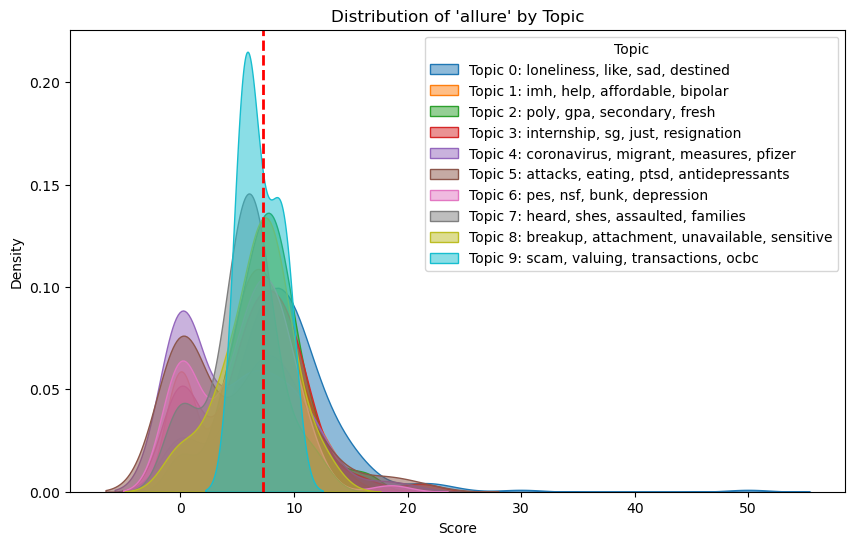

Plot saved at: plots/LIWC/allure.jpg


In [18]:
plot_smooth_distribution_by_topic(data, "allure",7.23) # curiosity

## Plotting for "lifestyle"

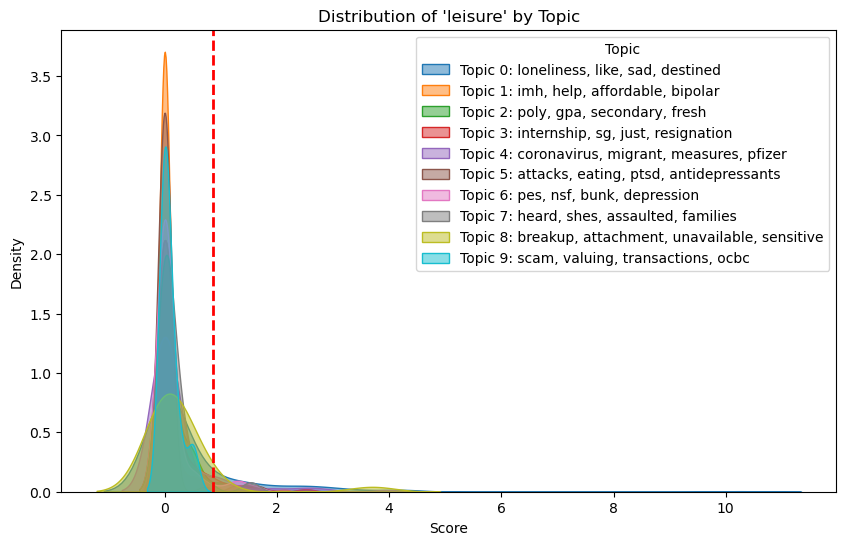

Plot saved at: plots/LIWC/leisure.jpg


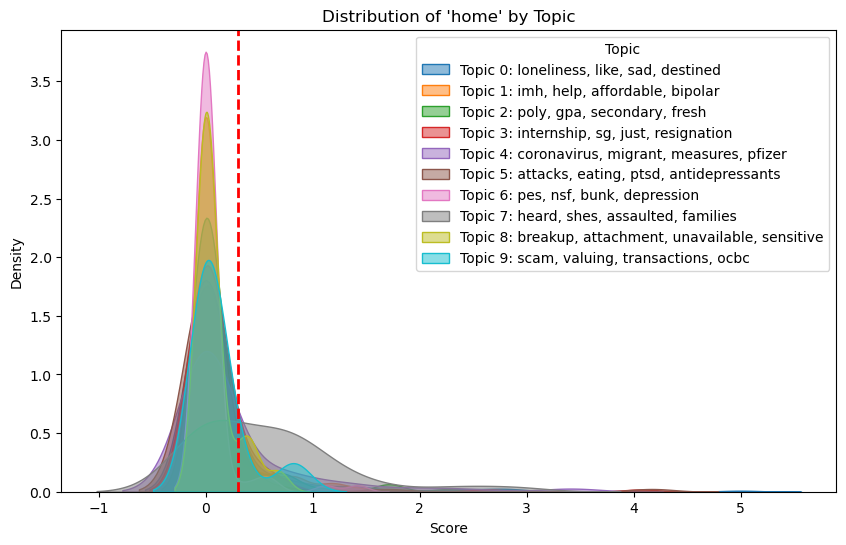

Plot saved at: plots/LIWC/home.jpg


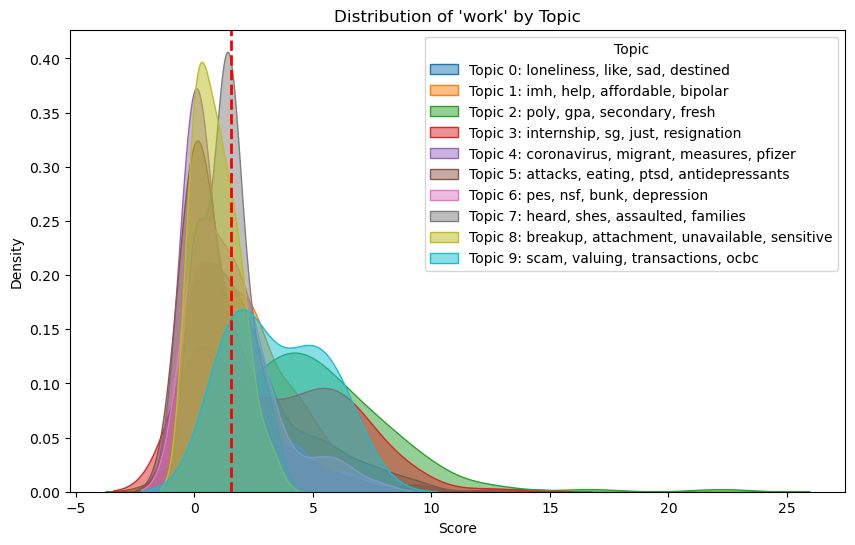

Plot saved at: plots/LIWC/work.jpg


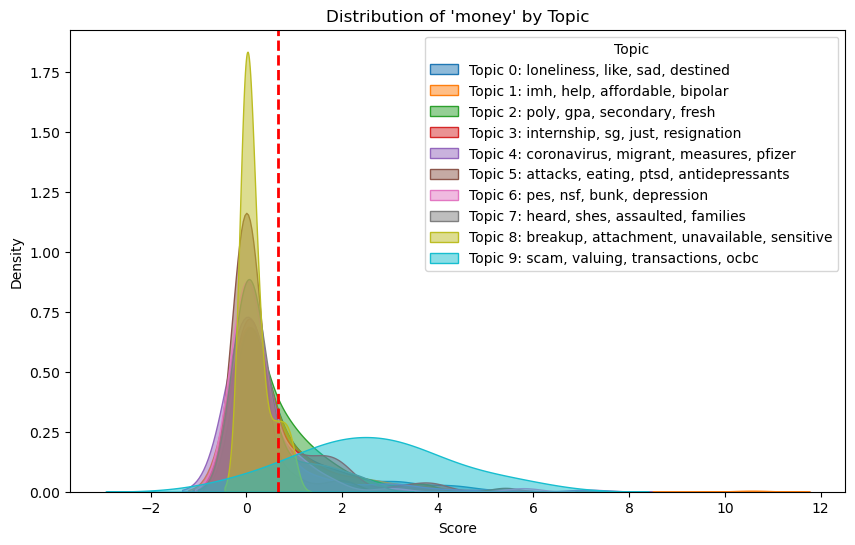

Plot saved at: plots/LIWC/money.jpg


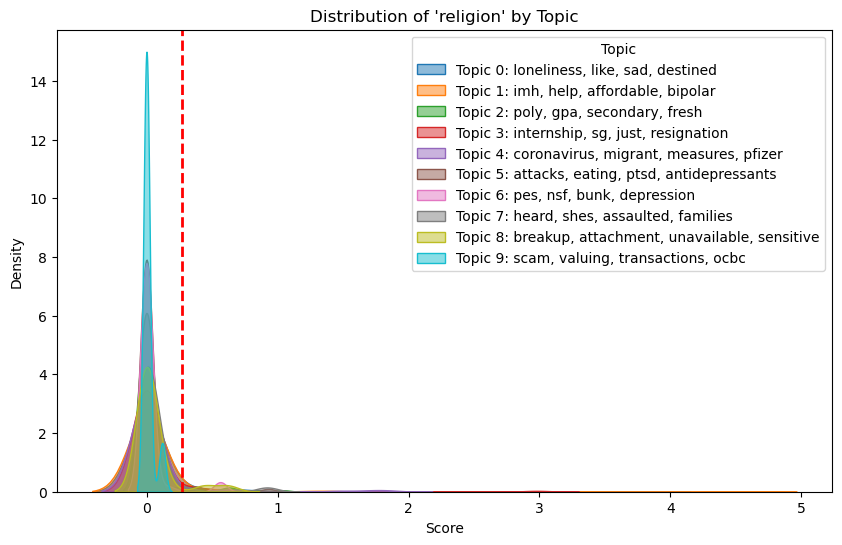

Plot saved at: plots/LIWC/religion.jpg


In [20]:
means,topics=[0.87,0.30,1.56,0.66,0.27],["leisure", "home","work","money","religion"]
for i in range(len(topics)):
    plot_smooth_distribution_by_topic(data, topics[i],means[i]) # curiosity


